# FUTURO DE PHOBOS: aproximación desde el medio continuo


## 1. Introducción

Independiente de cómo fue el origen de Phobos, las simulaciones deben mostrar que esta luna marciana se encuentra dentro del radio sincrónico del planeta. Ahora pues al tomar a Phobos dentro de este radio, el cual tiene una particularidad y es que para los cuerpos que se encuentran adentro de esta distancia el periodo rotacional es igual al periodo traslacional. Debido entonces a la disipación de marea, los cuerpos que se encuentren por dentro del radio sincrónico migrarán hacia el interior del planeta, y los que estén por fuera de este radio, deben de migrar hacia afuera. Para el caso de Marte este radio sincrónico es de 6.03 ~ $R_{M}$ [Black & Mittal 2015](https://www.nature.com/articles/ngeo2583), el cual da un valor de ∼ 20000 km. Phobos tiene un semieje mayor de 9376 km, por tanto se encuentra dentro del radio sincrónico de Marte, luego está migrando hacia el planeta (ver Figura 1). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#CREACIÓN DE CONSTANTES 

R_ph= 11000 #Radio  de Phobos
M_M= 6.41e23 #Radio de Marte
M_ph= 1.06e16 #Masa de Phobos
G = 6.67e-11 #Constante de Cavendish
R_M = 3389*1000
rho_ph= 1876 #Densidad Phobos
rho_M = 3933 #Densidad Marte
e_ph = 0.0151 #Excentricidad de Phobos
w_M = 7.1162e-5 #Periodo rotacional de Marte
n = 2.28e-4 #Velocidad angular media orbital
K=0.14 #Número de Love
Q= 88 #Factor disipativo 
a_ph = np.linspace(4800,9377.2,6000) #Semi-eje mayor Phobos
D_0 = np.linspace(3000,23000,100000) #Distancia entre los cuerpos


In [3]:
#DEFINICIONES 

def g_r(theta,r,m,D): #gravedad radial
    return (3*(np.cos(theta)**2)-1)*((r*G*m)/D**3)


def taua(M_M,M_ph,a_ph,R_M,R_ph,Q,K,n,e_ph,rho_M,rho_ph,w_M): #da/dt (ecuación 1 en Black & Mittal 2015)
    kappa = (rho_ph/rho_M)*(R_ph/R_M)**3
    P1 = 3*(K/Q)*(M_ph/M_M)*(np.sqrt(G*M_M)/(R_M**1.5))*(1+kappa)**0.5*(a_ph/R_M)**(-11./2.)*(1+(51/4*e_ph**2))
    P2 = np.sign(w_M-n)*(1+(19/22)*(a_ph/R_M)**(-2)+380/459*(a_ph/R_M)**(-4)+475/584*(a_ph/R_M)**(-6)+133/165*(a_ph/R_M)**(-7))
    
    return R_M*P1*P2

def esfuerzos(rho_ph,rho_M,Ax,Ay,Az,a_ph,R_M,a,b,c,w_ph): # ecuaciones 4,5,6 en Black & Mittal 2015
    sigmx = (rho_ph*w_ph**2 - (2*np.pi*G*Ax*rho_ph**2) + ((8*np.pi)/3.*G*rho_ph*rho_M*(a_ph/R_M)**(-3)))*(aph**2/5.)
    sigmy = (rho_ph*w_ph**2 - (2*np.pi*G*Ay*rho_ph**2) - ((4*np.pi)/3.*G*rho_ph*rho_M*(a_ph/R_M)**(-3)))*(bph**2/5.)
    sigmz = (-2*np.pi*G*Az*rho_ph**2- ((4*np.pi)/3.*G*rho_ph*rho_M*(a_ph/R_M)**(-3)))*(cph**2/5.)
    
    return sigmx,sigmy,sigmz

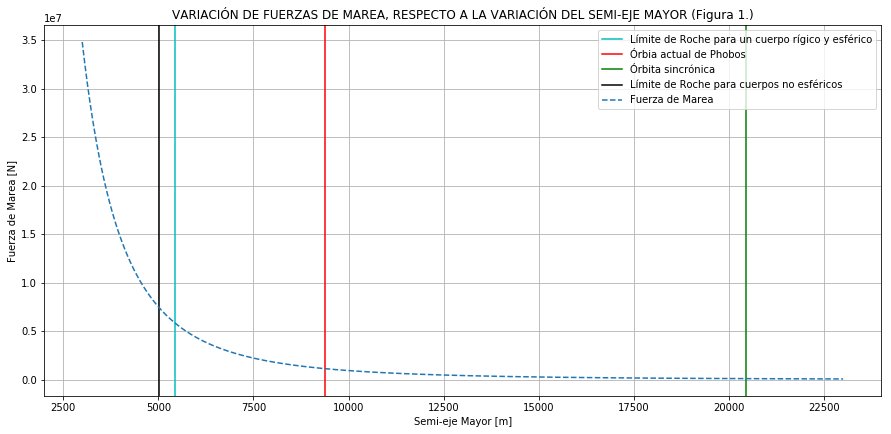

In [4]:
G_R = []

for i in range(len(D_0)):   #Usamos theta=0 por el bloqueo gravitacional
    G_R.append(g_r(0,R_ph,M_M,D_0[i]))
    
    
d_roche = 1.26*R_ph*(M_M/M_ph)**(1/3.) #Radio de Roche para cuerpos esféricos
d_rochenoesf = 5016000 #Radio de Roche para cuerpos no esféricos
d_ph = 9376000 
d_sinc = 20435000 #Radio sincrónico 

fig = plt.figure(figsize(15,15))
ax = fig.add_subplot(2,1,1)
ax.set_xlabel('Semi-eje Mayor [m]')
ax.set_ylabel('Fuerza de Marea [N]')
ax.grid(True)

ax.axvline(x=d_roche/1000.,color = 'c', label = "Límite de Roche para un cuerpo rígico y esférico") 
ax.axvline(x=d_ph/1000.,color = 'r',label = "Órbia actual de Phobos")
ax.axvline(x=d_sinc/1000.,color = 'g',label = "Órbita sincrónica")
ax.axvline(x=d_rochenoesf/1000.,color = 'k',label = "Límite de Roche para cuerpos no esféricos")

line, = ax.plot(D_0,G_R,'--',label = "Fuerza de Marea")

plt. title('VARIACIÓN DE FUERZAS DE MAREA, RESPECTO A LA VARIACIÓN DEL SEMI-EJE MAYOR (Figura 1.)')
ax.legend()

## 2. Dinámica de Phobos

También hay que tener en cuenta el periodo rotacional de Phobos que es 7.5 h [(Willner et al.2014)](https://www.sciencedirect.com/science/article/pii/S0032063313003309?via%3Dihub), mientras que Marte tiene un periodo rotacional de 1.02 dı́as. Esta diferencia hace que las mareas generadas por Phobos en Marte generen una disipación de mareas en la órbita del satélite. 

También es necesario tener en cuenta dos parámetrosa la hora de considerar las mareas de Marte y la disipación. El primero es el número de Love $K_{2}$ y el otro es $Q$. El primer parámetro cuantifica la amplitud de la respuesta y da cuenta de la rigidez de un cuerpo, donde $K_{2}=0$ es para un cuerpo totalmente rı́gido. Por otro lado $Q$ es el factor de disipación, este da cuenta de la respuesta de un cuerpo a la distorsión de marea [Black & Mittal 2015](https://www.nature.com/articles/ngeo2583).

Los valores para Marte estimados por [Nimmo & Faul (2013)](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2013JE004499) para $K_{2}$ y $Q$ son 0.148 y 88, respectivamente. Para estos valores, tenemos que $$\frac{da_{ph}}{dt} $$ (Black & Mittal 2015), es el cambio a determinar en el semieje mayor de Phobos en el tiempo.


Teniendo en cuenta que la forma de Phobos es irregular (13.03 $x$ 11.40 $x$ 9.14 km) (Willner et al. 2014), el esfuerzo de marea en cada eje no será el mismo, por lo que hay que considerar los términos de rotación, autogravedad y mareas, según Holsapple & Michel (2008). [Holsapple & Michel (2008)](https://stackoverflow.com/questions/25692293/inserting-a-link-to-a-webpage-in-an-ipython-notebook?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa)




In [5]:
#TENSOR DE ESFUERZO

da_dt = []

                                                                                              
for i in a_ph: #Variación del Semi-Eje da/dt
    da_dt.append(taua(M_M,M_ph,i*1000,R_M,R_ph,Q,K,n,e_ph,rho_M,rho_ph,w_M)*3600*365*24*100) 

a = 9377.2 #Semi-eje, valor inicial
t0 = 0
t = 0
ao = 0
a_t = []
t_T = []
da_dt = []

#Usamos para integrar el método leapfrog

while a >= 4000:
    
    dadt = taua(M_M,M_ph,a*1000,R_M,R_ph,Q,K,n,e_ph,rho_M,rho_ph,w_M)*3600*365*24*100
    ao = a*1000 - np.abs(dadt)
    t += 100
    a = ao/1000.
    a_t.append(a)
    t_T.append(t)
    da_dt.append(dadt)

Ax = 0.5394 #Coeficiente adimensional para la fórmula en el eje x
Ay = 0.6364 #Coeficiente adimensional para la fórmula en el eje y
Az = 0.8242 #Coeficiente adimensional para la fórmula en el eje z
aph = 13.03*1000 #Semieje de Phobos
bph = 11.4*1000 #Semieje de Phobos
cph = 9.14*1000 #Semieje de Phobos
w_ph = 2.3450e-4 #Velocidad angular media orbital

sig_x = []
sig_y = []
sig_z = []
sig_xz = []
a_z = []


for i in a_t:
    sigx, sigy, sigz = esfuerzos(rho_ph,rho_M,Ax,Ay,Az,i*1000,R_M,aph,bph,cph,w_ph)
    sig_x.append(sigx)
    sig_y.append(sigy)
    sig_z.append(sigz)

 
    


### 2.1 Tensor de esfuerzos

El esfuerzo de marea en cada eje estará dado por:

$$\large\sigma_{x}=[\rho_{ph}\omega^2_{ph}-\pi\rho^2GA_{x}+\frac{8\pi}{3}G\rho_{ph}\rho_{M}(\frac{a_{ph}}{R_{M}})^{-3}](\frac{x^2}{5})$$



$$\large\sigma_{y}=[\rho_{ph}\omega^2_{ph}-2\pi\rho^2GA_{y}+\frac{4\pi}{3}G\rho_{ph}\rho_{M}(\frac{a_{ph}}{R_{M}})^{-3}](\frac{y^2}{5})$$



$$\large\sigma_{z}=[-2\pi\rho^2GA_{z}-\frac{8\pi}{3}G\rho_{ph}\rho_{M}(\frac{a_{ph}}{R_{M}})^{-3}](\frac{z^2}{5})$$


[Holsapple & Michel (2008)](https://linkinghub.elsevier.com/retrieve/pii/S0019103507004538)Determinaron que Phobos tendrá un rompimiento por marea a ∼ 1.48 $R_{M}$, lo cual es
equivalente a 5016 km. Considerando el lı́mite de Roche para un cuerpo totalmente esférico, se ve
que el valor obtenido es de 5440 km, lo cual no está muy lejos del valor obtenido si consideramos a Phobos como un cuerpo totalmente irregular.

Para el dı́a de hoy se observa que aún domina la contribución de la autogravedad. También se observa que el valor para el $\sigma_{x}$ es mayor que los otros dos, esto tiene mucho sentido pues Phobos al estar en la
órbita sincrónica le está dando la misma cara al planeta, esta cara serı́a la componente en $x$ que está apuntando siempre hacı́a Marte. En la Figura 2 se puede observar cómo cambian las componentes del tensor de esfuerzo a medida que la luna se acerca al planeta. De esta gráfica podemos ver que todos empiezan siendo negativos, pero a medida que le semieje mayor de Phobos va siendo menor, el $\sigma_{x}$ va aumentando, mientras que los otros se van volviendo más negativos.


Text(0.5,1,'VARIACIÓN DE LAS COMPOTENTES DEL TENSOR DE ESFUERZO POR EL CAMBIO EN EL SEMIEJE (Figura 2)')

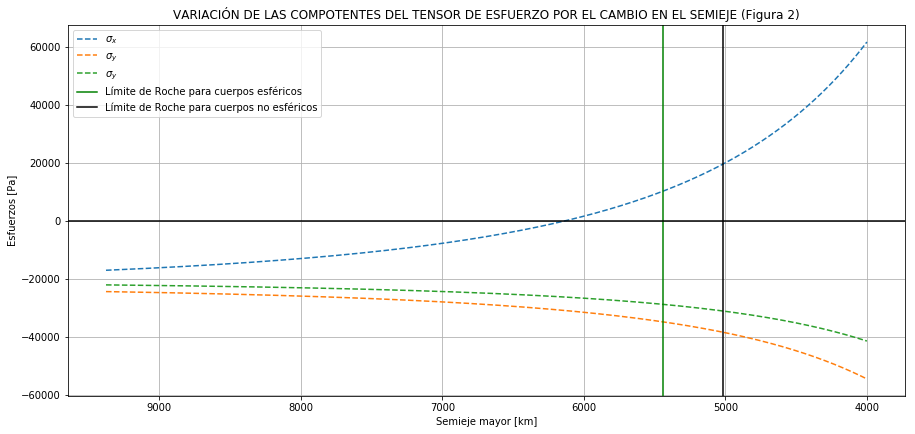

In [6]:
fig = plt.figure(figsize(15,15))
ax = fig.add_subplot(2,1,1)
ax.set_xlabel('Semieje mayor [km]')
ax.set_ylabel('Esfuerzos [Pa]')
ax.grid(True)
ax.invert_xaxis()
line, = ax.plot(a_t,sig_x,'--',label = r"$\sigma_{x}$")
line2, = ax.plot(a_t,sig_y,'--',label = r"$\sigma_{y}$")
line3, = ax.plot(a_t,sig_z,'--',label = r"$\sigma_{y}$")
ax.axvline(x=5440,color = 'g', label = "Límite de Roche para cuerpos esféricos")
ax.axvline(x=d_rochenoesf/1000.,color = 'k',label = "Límite de Roche para cuerpos no esféricos")
ax.axhline(y=0,color = 'k')
ax.legend(loc="best")
plt.title('VARIACIÓN DE LAS COMPOTENTES DEL TENSOR DE ESFUERZO POR EL CAMBIO EN EL SEMIEJE (Figura 2)')


De la Figura 2 también es posible observar cuando el $\sigma_{x}$ alcanza un valor tal que supera el lı́mite de Roche para un cuerpo esférico. El valor para este
$\sigma_{x}$= 10kPa, y el tiempo necesario para que ocurra esto es
de ∼ 1Myr desde el momento en que $\sigma_{x}$ es cero, por lo que, las deformaciones necesarias en el tensor de esfuerzo rompan el planeta necesitarı́an de este tiempo para resquebrajar el cuerpo y empiece a formar el anillo. Por otro lado, al considerar el lı́mite de Roche para cuerpos irregulares, el tiempo necesario para alcanzar el lı́mite es de ∼ 1.4Myr. En la Figura 3 se puede observar el cambio que sufre órbita de Phobos. Se alcanza a observar que ∼ 32Myr se da la caı́da más prominente de la luna hacia el planeta.

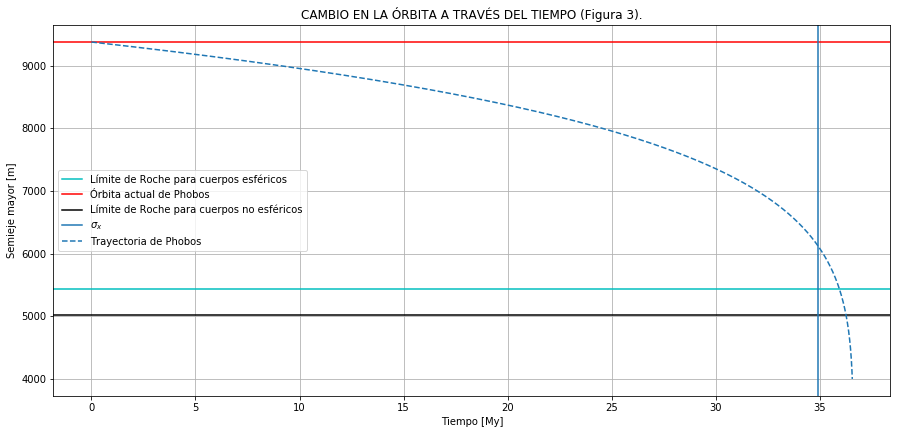

In [7]:
fig = plt.figure(figsize(15,15))
ax = fig.add_subplot(2,1,1)
ax.set_ylabel('Semieje mayor [m]')
ax.set_xlabel('Tiempo [My]')
ax.grid(True)

ax.axhline(y=d_roche/1000.,color = 'c', label = "Límite de Roche para cuerpos esféricos") 
ax.axhline(y=d_ph/1000.,color = 'r',label = "Órbita actual de Phobos")
ax.axhline(y=d_rochenoesf/1000.,color = 'k',label = "Límite de Roche para cuerpos no esféricos")
ax.axvline(x=34924700/1e6,label=r"$\sigma_{x}$")
line, = ax.plot(np.array(t_T)/1e6,a_t,'--',label = "Trayectoria de Phobos")
plt.title('CAMBIO EN LA ÓRBITA A TRAVÉS DEL TIEMPO (Figura 3).')
ax.legend(loc="best")

Comparando la Figura 3 con la Figura 4, se observa que aproximadamente en el mismo tiempo es cuando la velocidad de aproximación de Phobos hacia Marte aumenta, por lo que era de esperarse. De la
Figura 4 podemos observar el por qué la separación temporal entre el lı́mite de Roche para un cuerpo esférico y para un cuerpo irregular ocurre en solo ∼ 400000 años. Después de los 35Myr el punto donde $\sigma_{x}$ pasa de ser negativo a positivo tiene un impacto significativo en el cambio del semieje mayor y en la velocidad con la cual esta cambiando, esto podrı́a ocurrir por la gran deformación que tiene Phobos para este punto, lo cual harı́a que el desvalance del centro de masa esté más tirado hacı́a el planeta, provocando ası́ que se de este aumento en la velocidad. 

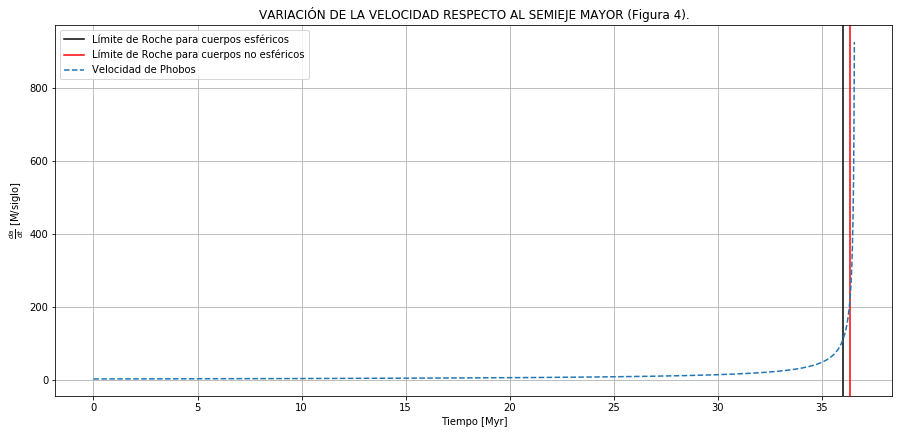

In [8]:
fig = plt.figure(figsize(15,15))
ax = fig.add_subplot(2,1,1)
ax.set_ylabel(r"$\frac{da}{dt}$ [M/siglo]")
ax.set_xlabel('Tiempo [Myr]')
ax.grid(True)
ax.axvline(x = 36004200/1e6,color = 'k', label= "Límite de Roche para cuerpos esféricos")
ax.axvline(x = 36337900/1e6, color = 'r', label= "Límite de Roche para cuerpos no esféricos")
line, = ax.plot(np.array(t_T)/1e6,np.abs(da_dt),'--',label = "Velocidad de Phobos")
plt.title('VARIACIÓN DE LA VELOCIDAD RESPECTO AL SEMIEJE MAYOR (Figura 4).')
ax.legend(loc="best")

## 3. Conclusiones

Considerar a Phobos como un cuerpo completamente esférico da buenos resultados a la hora de determinar el lı́mite de Roche (ver Figura 1)

Aunque en todos los cálculos se tuvo en cuenta el lı́mite de Roche para un cuerpo completamente esférico, la diferencia de tiempo para que ocurra la destrucción de Phobos varı́a en 400000 años. Aunque este tiempo es quizás alto no serı́a un gran problema pues como es sabido, determinar la forma y tamaño de los cuerpos en el Universo es un tema complicado, debido a la carencia de instrumentos que nos permitan analizar con gran detalle cuerpos que no emiten luz.

Se encontró que hay un aumento en la velocidad a la cual cambia el semieje mayor después que $\sigma_{x}$ cambia su valor de negativo a positivo. Esto ocurrirı́a en unos 35Myr (ver Figura 4). Este aumento en la velocidad se puede deber a la gran deformación que tendrı́a Phobos para este tiempo, provocando ası́ que el centro de masa del satélite esté más desplazado hacia Marte.

## 4. Referencias 

Black B. A., Mittal T., 2015, [Nature Geoscience, 8, 913](dx.doi.org/10.1038/ngeo2583)

Willner K., Shi X., Oberst J., [2014, Planet. Space Sci., 102, 51](https://linkinghub.elsevier.com/retrieve/pii/S0032063313003309)

Nimmo F., Faul U. H., 2013, [Journal of Geophysical Research (Planets), 118, 2558](http://adsabs.harvard.edu/abs/2013JGRE..118.2558N)

Holsapple K. A., Michel P., 2008, [Icarus, 193, 283](http://adsabs.harvard.edu/abs/2008Icar..193..283H)

ELABORADO POR: 

Natalia Alvarez Baena 

c.c. 1.035.441.007